In [1]:
# data handling
import os
import numpy as np
import pandas as pd
import warnings

# allen packages
import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorNeuropixelsProjectCache
import brain_observatory_utilities.datasets.behavior.data_formatting as behavior_utils

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# repo functions
import utils

# magic functions for jupyter notebook plotting
%load_ext autoreload
%autoreload 2
%matplotlib inline

# config
pd.options.display.max_columns = None
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
# warnings.filterwarnings("ignore")

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cache_dir = utils.get_data_root()
cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
    cache_dir=cache_dir, use_static_cache=True
)

In [3]:
# get the metadata tables
ecephys_session_table = cache.get_ecephys_session_table()
ecephys_session_table = ecephys_session_table.loc[~ecephys_session_table["behavior_session_id"].isna()]

In [155]:
%%time 

def get_session_data(session_idx):
    session = cache.get_ecephys_session(ecephys_session_id=session_idx)
    stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
    stimulus_presentations[stimulus_presentations.auto_rewarded.isnull()==False]
    
    mean_trial_pupil = np.array([np.mean(stimulus_presentations[stimulus_presentations.trials_id == trial].mean_pupil_width)
     for trial in stimulus_presentations.trials_id.unique()])
    
    mean_trial_running_speed = np.array([np.mean(stimulus_presentations[stimulus_presentations.trials_id == trial].mean_running_speed)
     for trial in stimulus_presentations.trials_id.unique()])

    data = pd.DataFrame({"session_idx" : session_idx,
                         "trial_id" : stimulus_presentations.trials_id,
                         "image_name" : stimulus_presentations.image_name,
                         "is_change" : stimulus_presentations.is_change,
                         "hits" : stimulus_presentations.hit,
                         "licks" : stimulus_presentations.licks.map(len),
                         "mean_running_speed" : mean_trial_running_speed,
                         "mean_trial_pupil" : mean_trial_pupil})
            
    return data

all_sessions = pd.DataFrame()
for session_idx in ecephys_session_table.index:
    data = get_session_data(session_idx)
    all_sessions = pd.concat([all_sessions, data], ignore_index=True)
    break
all_sessions

/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/brain_observatory_utilities/datasets/behavior/data_formatting.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['change_trials_id'] = trials.index.values


ValueError: array length 669 does not match index length 4800

In [141]:
session = cache.get_ecephys_session(ecephys_session_id=1044385384)
stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
stimulus_presentations[stimulus_presentations.auto_rewarded.isnull()==False]
stimulus_presentations.head(50)

/opt/conda/lib/python3.9/site-packages/hdmf/utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
/opt/conda/lib/python3.9/site-packages/brain_observatory_utilities/datasets/behavior/data_formatting.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['change_trials_id'] = trials.index.values


,trials_id,stimulus_block,image_name,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,flashes_since_change,stimulus_index,color,orientation,rewarded,contrast,active,temporal_frequency,spatial_frequency,stimulus_name,is_sham_change,position_x,position_y,licks,mean_running_speed,mean_pupil_width,change_trials_id,change_time,go,catch,auto_rewarded,hit,miss,false_alarm,correct_reject,response_time,reward_time,reward_volume,time_from_last_change,licked,stimulus_count_within_trial,previous_image_name,previous_response_on_trial,previous_change_on_trial,could_change,pre_change,lick_on_next_flash,pre_omitted,post_omitted,reward_rate,engaged,engagement_state,epoch
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,im036_r,0.250204,26.243883,26.494087,60,75,False,False,False,0,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,"[26.5401, 26.83424]",1.147943,0.443987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,None,False,False,False,False,True,False,<NA>,inf,True,engaged,0
1,0,0,im036_r,0.250204,26.994494,27.244698,105,120,False,False,False,1,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[27.00033],8.728821,0.448501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,im036_r,True,False,False,False,False,False,False,inf,True,engaged,0
2,1,0,im036_r,0.250211,27.745120,27.995332,150,165,False,False,False,2,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],6.074537,0.439893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,im036_r,False,False,False,False,False,False,False,inf,True,engaged,0
3,1,0,im036_r,0.250209,28.495752,28.745960,195,210,False,False,False,3,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],7.014378,0.451072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,im036_r,False,False,False,False,False,False,False,inf,True,engaged,0
4,1,0,im036_r,0.250214,29.246378,29.496592,240,255,False,False,False,4,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],5.763733,0.461022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,2,im036_r,False,False,False,False,False,False,False,inf,True,engaged,0
5,1,0,im036_r,0.250214,29.997019,30.247233,285,300,False,False,False,5,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],5.972974,0.378512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,3,im036_r,False,False,False,False,False,False,False,inf,True,engaged,0
6,1,0,im036_r,0.250204,30.747640,30.997844,330,345,False,False,False,6,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],10.057717,0.392745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,4,im036_r,False,False,True,False,False,False,False,inf,True,engaged,0
7,1,0,im036_r,0.250211,31.498259,31.748470,375,390,False,False,False,7,-99,NaN,NaN,False,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,[],7.885386,0.428132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,5,im036_r,False,False,True,True,True,False,False,inf,True,engaged,0
8,1,0,im111_r,0.250211,32.248893,32.499104,420,435,True,False,False,0,-99,NaN,NaN,True,NaN,True,NaN,NaN,Natural_Images_Lum_Matched_set_ophys_G_2019,False,NaN,NaN,"[32.73244, 32.92954]",2.261838,0.442149,1.0,32.20433,False,False,True,False,False,False,False,32.73711,32.35446,0.005,0.000000,True,6,im036_r,False,False,True,False,True,True,False,inf,True,engaged,0


In [166]:
stimulus_presentations.hit.head(50)

stimulus_presentations_id
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8     False
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24    False
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36    False
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
Name: hit, dtype: object

In [167]:
stimulus_presentations.groupby('trials_id').mean()['hit']

# mean_trial_pupil = []
# for trial in stimulus_presentations.trials_id.unique():
#     mean_trial_pupil.append(np.mean(stimulus_presentations[stimulus_presentations.trials_id == trial].mean_pupil_width))

# mean_trial_pupil = np.array([np.mean(stimulus_presentations[stimulus_presentations.trials_id == trial].mean_pupil_width)
#      for trial in stimulus_presentations.trials_id.unique()])

# mean_trial_pupil.shape

AttributeError: 'DataFrameGroupBy' object has no attribute 'nanmean'

In [21]:
all_sessions.to_csv('../data/behavior_data.csv', index=False)

In [134]:
all_sessions = pd.read_csv("../data/behavior_data.csv")

In [135]:
all_sessions.query("session_idx == 1044385384")

,session_idx,image_name,is_change,hits,licks,response_times,mean_running_speed,mean_pupil_width
0,1044385384,im078_r,True,True,1,0.422640,3.255855,0.460848
1,1044385384,im111_r,True,False,0,0.788512,2.733525,0.475357
2,1044385384,im047_r,True,False,0,1.021945,5.035739,0.417490
3,1044385384,im083_r,True,False,1,0.738438,3.609429,0.418311
4,1044385384,im083_r,False,False,0,4.374737,19.291291,0.429713
...,...,...,...,...,...,...,...,...
269,1044385384,im078_r,True,True,2,0.372341,0.840756,0.491558
270,1044385384,im078_r,False,False,0,2.172910,24.235401,0.546602
271,1044385384,im012_r,True,False,0,NaN,13.474877,0.543792
272,1044385384,im078_r,True,False,0,NaN,7.759538,0.461236


In [70]:
t = 1044594870
all_sessions.query("session_idx == @t").reset_index()

,index,session_idx,image_name,is_change,hits,licks,response_times,mean_running_speed,mean_pupil_width
0,274,1044594870,im005_r,True,True,1,0.539366,5.956468,0.431843
1,275,1044594870,im083_r,True,True,1,0.656031,6.608230,0.415770
2,276,1044594870,im005_r,True,True,1,0.606274,5.891214,0.415425
3,277,1044594870,im114_r,True,True,6,0.087881,0.520819,0.359174
4,278,1044594870,im087_r,True,True,3,-0.044676,3.200342,0.397740
...,...,...,...,...,...,...,...,...,...
220,494,1044594870,im087_r,True,False,0,1.906036,46.239647,0.471302
221,495,1044594870,im114_r,True,False,0,NaN,42.533259,0.432042
222,496,1044594870,im111_r,True,False,0,NaN,44.245880,0.442813
223,497,1044594870,im083_r,True,False,0,4.191188,0.063243,0.412891


In [126]:
unique_sessions_idx = all_sessions.session_idx.unique()

array([1044385384, 1044594870, 1047969464, 1047977240, 1048189115,
       1048196054, 1049273528, 1049514117, 1051155866, 1052342277,
       1052533639, 1053709239, 1053718935, 1053925378, 1053941483,
       1055221968, 1055240613, 1055403683, 1055415082, 1062755779,
       1063010385, 1064400234, 1064415305, 1064639378, 1064644573,
       1065437523, 1065449881, 1065905010, 1065908084, 1067588044,
       1067781390, 1069461581, 1071300149, 1081079981, 1081090969,
       1081429294, 1081431006, 1086200042, 1086410738, 1087720624,
       1087992708, 1089296550, 1090803859, 1091039376, 1091039902,
       1092283837, 1092466205, 1093638203, 1093642839, 1093864136,
       1093867806, 1095138995, 1095340643, 1096620314, 1096935816,
       1098119201, 1099598937, 1099869737, 1104052767, 1104058216,
       1104289498, 1104297538, 1105543760, 1105798776, 1108334384,
       1108335514, 1108528422, 1108531612, 1109680280, 1109889304,
       1111013640, 1111216934, 1112302803, 1112515874, 1115077

0.7978257784409907


Text(0.5, 1.0, 'correlation between hits and licks across sessions')

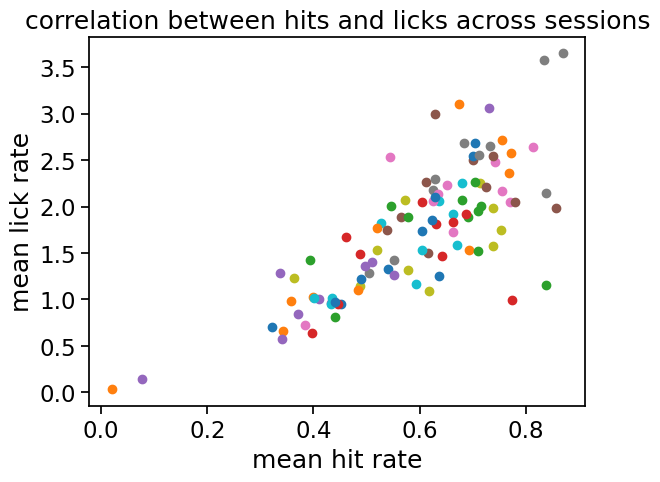

In [115]:
corrs = []
for ses in unique_sessions_idx:
    df = all_sessions.query("session_idx == @ses").reset_index()
    corrs.append(np.corrcoef(df.hits, df.licks)[0,1])
    plt.scatter(np.mean(df.hits), np.mean(df.licks))

print(np.mean(corrs))
plt.xlabel("mean hit rate")
plt.ylabel("mean lick rate")
plt.title("correlation between hits and licks across sessions")

Text(0.5, 0, 'trials')

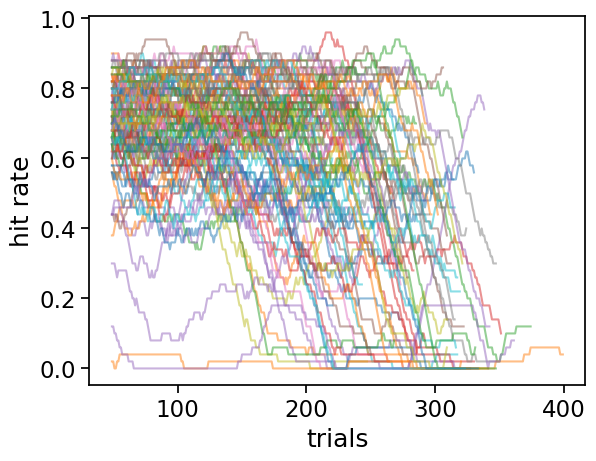

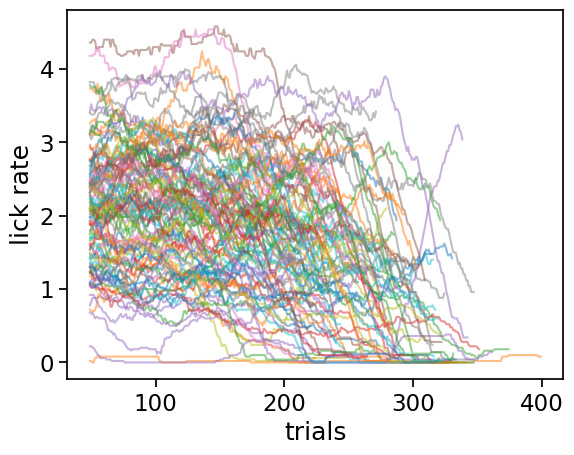

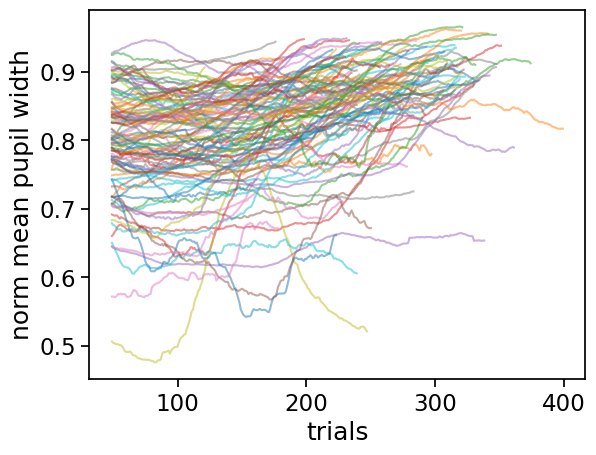

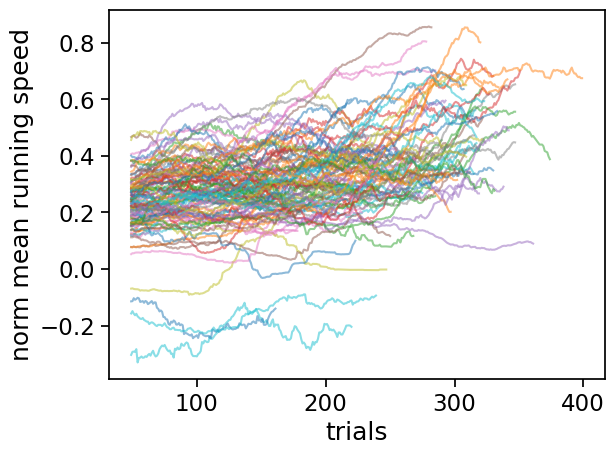

In [132]:
plt.figure()
for ses in unique_sessions_idx:
    df = all_sessions.query("session_idx == @ses").reset_index()
    sns.lineplot(df.hits.rolling(50).mean(), alpha = 0.5)
plt.ylabel("hit rate")
plt.xlabel("trials")

plt.figure()
for ses in unique_sessions_idx:
    df = all_sessions.query("session_idx == @ses").reset_index()
    sns.lineplot(df.licks.rolling(50).mean(), alpha = 0.5)
plt.ylabel("lick rate")
plt.xlabel("trials")

plt.figure()
for ses in unique_sessions_idx:
    df = all_sessions.query("session_idx == @ses").reset_index()
    sns.lineplot((df.mean_pupil_width/df.mean_pupil_width.max()).rolling(50).mean(), alpha = 0.5)
plt.ylabel("norm mean pupil width")
plt.xlabel("trials")

plt.figure()
for ses in unique_sessions_idx:
    df = all_sessions.query("session_idx == @ses").reset_index()
    sns.lineplot((df.mean_running_speed/df.mean_running_speed.max()).rolling(50).mean(), alpha = 0.5)
plt.ylabel("norm mean running speed")
plt.xlabel("trials")

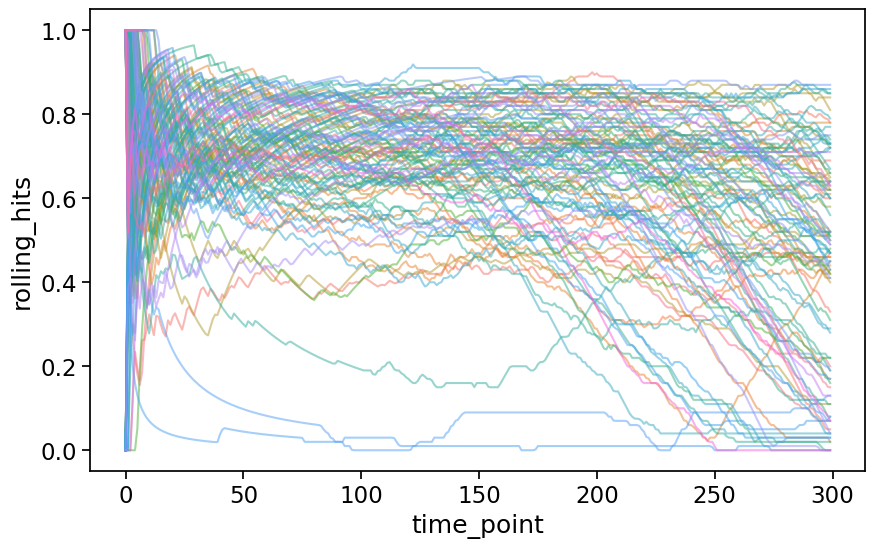

In [116]:
import numpy as np

# Step 1: Create a time_point column
all_sessions['time_point'] = all_sessions.groupby('session_idx').cumcount()

# Step 2: Calculate the rolling average of hits
window_size = 100
all_sessions['rolling_hits'] = all_sessions.groupby('session_idx')['hits'].transform(lambda x: x.rolling(window_size, min_periods=1).mean())

# Step 3: Interpolate sessions to a common length
desired_length = 300
def interpolate_session(df, desired_length):
    x = np.linspace(0, 1, len(df))
    x_new = np.linspace(0, 1, desired_length)
    interpolated_df = pd.DataFrame({
        'session_idx': df['session_idx'].iloc[0],  # Keep the session index constant
        'time_point': np.arange(desired_length),  # New time points
        'hits': np.interp(x_new, x, df['hits']),
        'rolling_hits': np.interp(x_new, x, df['rolling_hits'])  # Interpolate rolling hits
    })
    return interpolated_df

all_sessions_interpolated = all_sessions.groupby('session_idx').apply(lambda df: interpolate_session(df, desired_length)).reset_index(drop=True)

# Step 4: Plot the interpolated rolling average
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_sessions_interpolated, x='time_point', y='rolling_hits', hue='session_idx', palette="husl", alpha=0.5, legend=False)
plt.show()

In [ ]:
# def get_hits_licks(session):
#     print("I got to the function!")
#     stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
#     stimulus_presentations = stimulus_presentations[stimulus_presentations.auto_rewarded==False]
#     hits = stimulus_presentations.hit
#     licks = stimulus_presentations.licks.map(len)
#     return (hits, licks)

# hits, licks = utils.parallel_session_map(get_hits_licks, ecephys_session_table.index, "ephys", batch_size=5)

In [ ]:
# from random import sample

# ses_idx = sample(ecephys_sessions_table.index.tolist(), 8)

In [ ]:
def get_hits_licks(session):
    print("I got to the function!")
    stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
    stimulus_presentations = stimulus_presentations[stimulus_presentations.auto_rewarded==False]
    hits = stimulus_presentations.hit
    licks = stimulus_presentations.licks.map(len)
    return (hits, licks)

hits, licks = utils.parallel_session_map(get_hits_licks, ecephys_session_table.index, "ephys")

In [ ]:
def get_hits_licks(session):
    print("hi")
    stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)
    stimulus_presentations = stimulus_presentations[stimulus_presentations.auto_rewarded==False]
    hits = stimulus_presentations.hit
    licks = stimulus_presentations.licks.map(len)
    return (hits, licks)

data = {"ses_idx" : [],
        "hits" : [],
        "licks" : []
       }

for session in ecephys_session_table.index:
    hits, licks = get_hits_licks(session)
    data["ses_idx"].append(session)
    data["hits"].append(hits)
    data["licks"].append(licks)

In [ ]:
hits

In [ ]:
#test session to start playing around with
session = cache.get_ecephys_session(ecephys_session_id=1065437523)

In [ ]:
#this is for getting behavior-related information for a given session
stimulus_presentations = behavior_utils.get_annotated_stimulus_presentations(session)

In [ ]:
stimulus_presentations = stimulus_presentations[stimulus_presentations.auto_rewarded==False]

In [ ]:
#look at image name counts
plt.figure(figsize=(10,4))
sns.countplot(data=stimulus_presentations, x='image_name', color = 'b', alpha = 0.5, stat='proportion')
plt.tight_layout()

In [ ]:
#look at change trials dist
plt.figure(figsize=(4,4))
sns.countplot(data=stimulus_presentations, x='is_change', color = 'b', alpha = 0.5, stat='proportion')
plt.tight_layout()

In [ ]:
#look at mean running speed dist
plt.figure(figsize=(4,4))
sns.kdeplot(data=stimulus_presentations, x='mean_running_speed', color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
#look at mean pupil width dist
plt.figure(figsize=(4,4))
sns.kdeplot(data=stimulus_presentations, x='mean_pupil_width', color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
np.sort(stimulus_presentations.keys())

In [ ]:
#look at mean pupil width across the session
plt.figure(figsize=(8,4))
sns.lineplot(x = np.arange(0, len(stimulus_presentations.mean_pupil_width), 1),
             y = stimulus_presentations.mean_pupil_width.rolling(10).mean(), color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
#look at mean running speed across the session
plt.figure(figsize=(8,4))
sns.lineplot(x = np.arange(0, len(stimulus_presentations.mean_running_speed), 1),
             y = stimulus_presentations.mean_running_speed.rolling(10).mean(), color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
#average hit and miss rate
hit_rate = len(stimulus_presentations[stimulus_presentations.hit==True])/len(stimulus_presentations[np.logical_and(stimulus_presentations.is_change == True, stimulus_presentations.auto_rewarded == False)])
miss_rate = len(stimulus_presentations[stimulus_presentations.miss==True])/len(stimulus_presentations[np.logical_and(stimulus_presentations.is_change == True, stimulus_presentations.auto_rewarded == False)]) 

print(f"hit rate: {hit_rate}\nmiss rate: {miss_rate}")

In [ ]:
#look at hit rate throughout the session
plt.figure(figsize=(8,4))
sns.lineplot(x = np.arange(0, len(stimulus_presentations.hit), 1),
             y = stimulus_presentations.hit.rolling(10).mean(), color = 'b', alpha = 0.5)
plt.tight_layout()
plt.ylabel('hit rate')

In [ ]:
#look at false alarm rate throughout the session - not a very useful metric from what it seems
plt.figure(figsize=(8,4))
sns.lineplot(x = np.arange(0, len(stimulus_presentations.false_alarm), 1),
             y = stimulus_presentations.false_alarm.rolling(10).mean(), color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(4,4))
sns.kdeplot(stimulus_presentations.response_time - stimulus_presentations.start_time, color = 'b', alpha = 0.5)
plt.xlabel('response_times')

In [ ]:
#actual response times timeseries, excluding aborted trials - don't think we should use this
actual_response_times = pd.DataFrame({'response_times':stimulus_presentations.response_time - stimulus_presentations.start_time}).dropna()
plt.figure(figsize=(8,4))
sns.lineplot(data=actual_response_times.response_times.rolling(10).mean(), color = 'b', alpha = 0.5)
plt.tight_layout()

In [ ]:
session.get_performance_metrics()

In [ ]:
stimulus_presentations.licks.apply(len)
# lick rate?
#look at hit rate throughout the session
plt.figure(figsize=(8,4))
sns.lineplot(x = np.arange(0, len(stimulus_presentations.licks.apply(len)), 1),
             y = stimulus_presentations.licks.apply(len).rolling(10).mean(), color = 'b', alpha = 0.5)
plt.ylabel('licks per trial')
plt.tight_layout()